In [1]:
import numpy as np
import glob
from construct_dataset import npy_toxarray

import psyplot
import psyplot.project as psy
from psy_maps.plotters import FieldPlotter

# Check preprocessing

## low resolution

In [12]:
path = '/lustre/fsn1/projects/rech/psl/upu87pm/low_res_data/dataset_stride_7/'
grid_b = '/lustre/fswork/projects/rech/psl/upu87pm/_hyrid_climate_modelling_/BuildGrid/grid_lr_with_boundaries.nc'

In [13]:
path_ = '/gpfswork/rech/psl/upu87pm/_hyrid_climate_modelling_/data_processing/normalization_factors/glob_low_res/'

col1_mean_GLOB = np.load(path_ + 'col1_mean_GLOB.npy')
col1_std_GLOB = np.load(path_ + 'col1_std_GLOB.npy')

col1_mean_GLOB_o = np.load(path_ + 'col1_mean_GLOB_o.npy')
col1_std_GLOB_o = np.load(path_ + 'col1_std_GLOB_o.npy')

col1_std_GLOB = np.nan_to_num(col1_std_GLOB, nan=1e-20)
col1_std_GLOB_o = np.nan_to_num(col1_std_GLOB_o, nan=1e-20)
col1_std_GLOB_o[col1_std_GLOB_o==0.] = 1e-20

In [14]:
files = glob.glob(path + 'input_*.npy')
files = sorted(files)
n = np.load(files[0]).shape[0]
print("found ", len(files), "files for test set, each of them contains ", n, "samples ==> ", len(files)*n, "samples")

found  400 files for test set, each of them contains  23808 samples ==>  9523200 samples


In [16]:
ts = 30
ncol = 384
print(n//ncol, "time steps per file")
f = (np.load(files[300])[ts*ncol:ts*ncol + 384,:])# - col1_mean_GLOB)/col1_std_GLOB
f.shape

62 time steps per file


(384, 556)

In [17]:
#f_norm = (f - col1_mean_GLOB_o)/col1_std_GLOB_o

In [18]:
var = 'ptend_t'

In [19]:
ds = npy_toxarray(f, grid_b, var, unscale = "")

time counter =  1
shape;  (1, 60, 384)


In [20]:
ds

<xarray.Dataset> Size: 259kB
Dimensions:       (ncol: 384, lev: 60, ilev: 61, nvertex: 10, time_counter: 1)
Coordinates:
    lat           (ncol) float64 3kB ...
    lon           (ncol) float64 3kB ...
  * lev           (lev) float64 480B 0.0 1.0 2.0 3.0 4.0 ... 56.0 57.0 58.0 59.0
  * ilev          (ilev) float64 488B 0.0 1.0 2.0 3.0 ... 57.0 58.0 59.0 60.0
    bounds_lat    (ncol, nvertex) float64 31kB -38.86 -35.26 ... 35.26 35.26
    bounds_lon    (ncol, nvertex) float64 31kB -36.32 -45.0 ... 135.0 135.0
  * ncol          (ncol) int64 3kB 0 1 2 3 4 5 6 ... 377 378 379 380 381 382 383
  * time_counter  (time_counter) int64 8B 0
Dimensions without coordinates: nvertex
Data variables:
    area          (ncol) float64 3kB ...
    ptend_t       (time_counter, lev, ncol) float64 184kB 207.2 208.2 ... 291.5
Attributes:
    description:  test_climsim

In [21]:
import warnings
warnings.filterwarnings('ignore')

time_counter = 0
inf = -2e-3
sup = 2e-3
nc = 31
lev = 58


inf = ds[var][time_counter][lev].min()
sup = ds[var][time_counter][lev].max()
b = max(abs(inf), abs(sup))

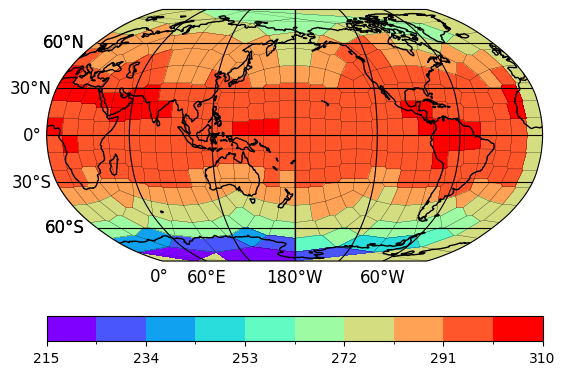

In [22]:
map_out = ds.psy.plot.mapplot(name=var, time_counter = time_counter, lev = lev, cmap = 'rainbow', datagrid={'c': 'k', 'lw': 0.1}, projection='robin')